# Part I: Recurrent neural network (60%) 
1, Use a sequential data set (can be text data set or other types).

#  Business question
Given the daily power requirement of a household for the past 30 days, what is the expected household power usage for the next day?

Data Background:

The Household Power Consumption dataset is a multivariate time series dataset that describes the electricity consumption (with a one-minute sampling rate) for a single household over four years

The data contains 2,075,259 observations and 8 features (including timestamp) collected from a house in France between December 2006 and November 2010

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python3.8 -m pip install --upgrade pip


/usr/local/lib64/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/usr/local/lib64/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1824894 entries, 2006-12-16 17:24:00 to 2010-06-06 00:17:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   global_active_power    object 
 1   global_reactive_power  object 
 2   voltage                object 
 3   global_intensity       object 
 4   sub_metering_1         object 
 5   sub_metering_2         object 
 6   sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 111.4+ MB


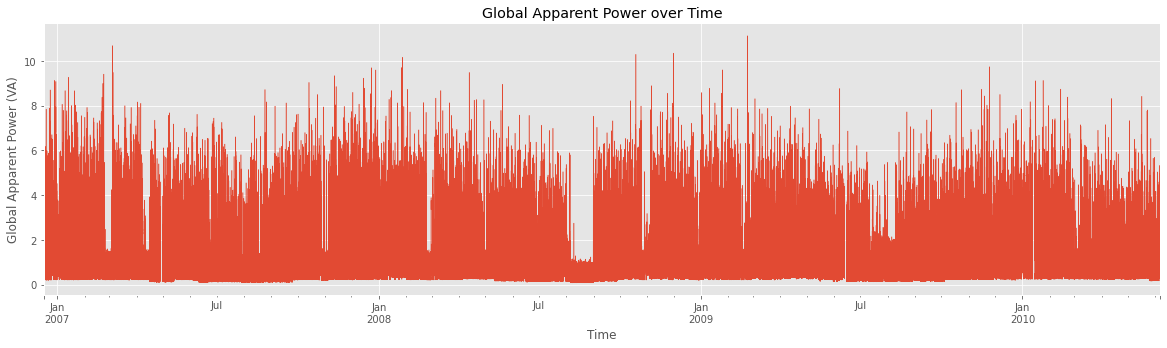

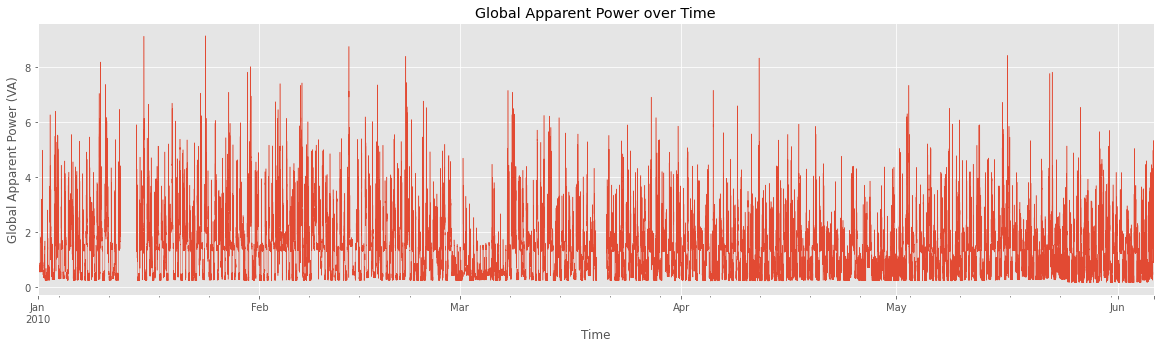

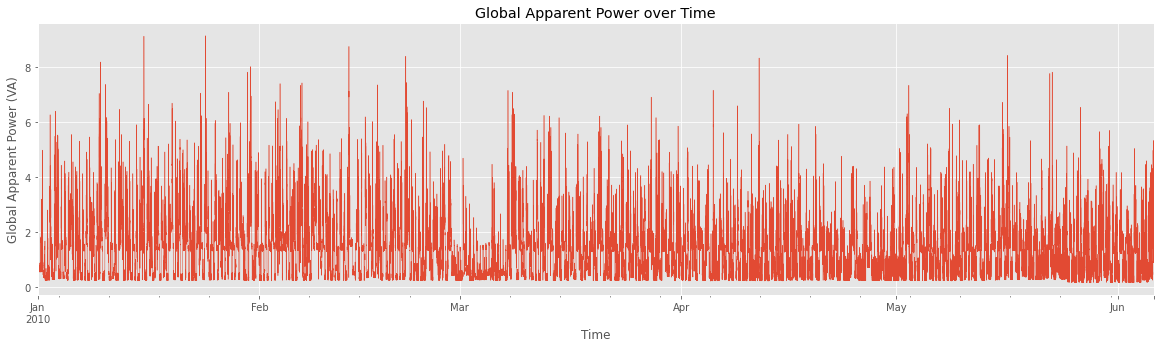

(1269, 1)
(1269, 4)


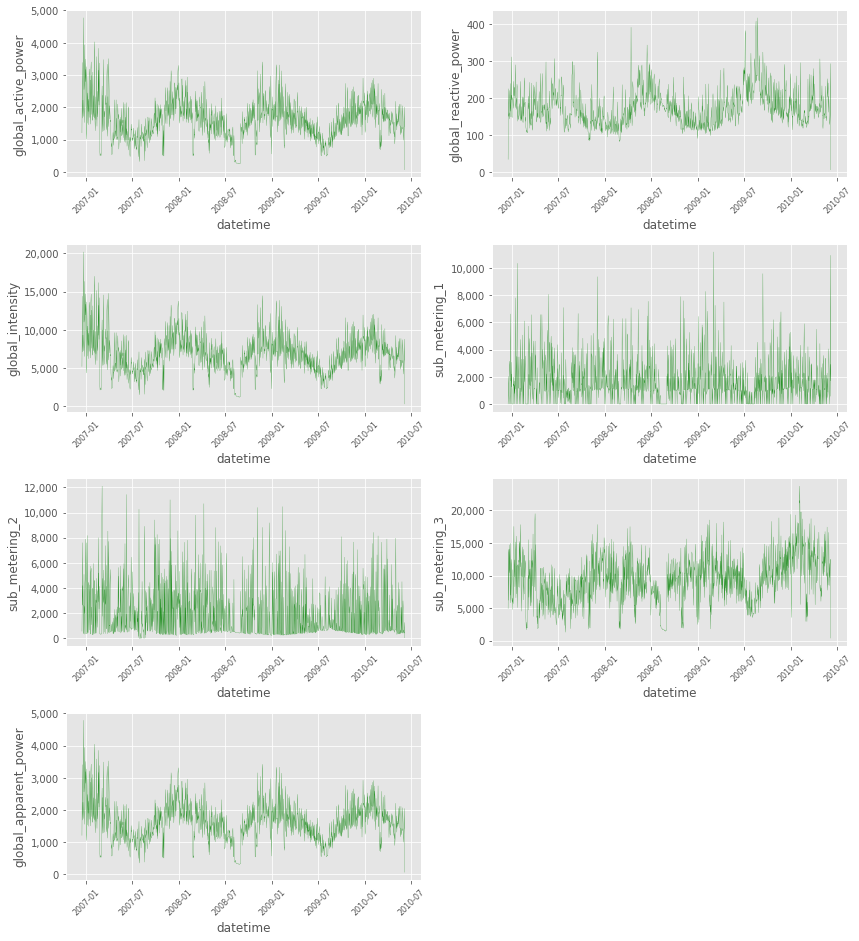

Shape train: (1015, 1) 
Shape test: (254, 1) 

[[0.20115306]
 [0.69214285]
 [0.42734569]
 [0.30746361]
 [0.43176138]]


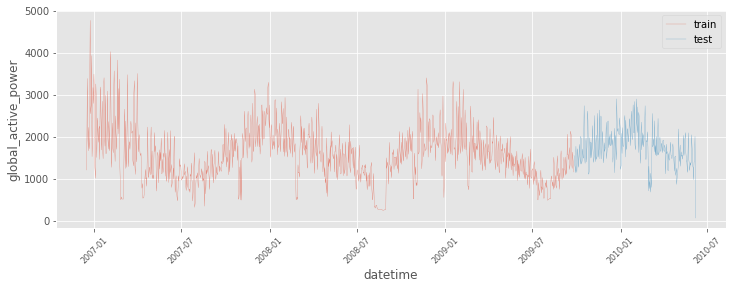

Shape X_train y_train: (985, 30, 1) (985, 1, 1) 
Shape X_test y_test: (224, 30, 1) (224, 1, 1) 

[[0.20115306]
 [0.69214285]
 [0.42734569]
 [0.30746361]
 [0.43176138]
 [0.31809196]
 [0.45908132]
 [1.        ]
 [0.50336003]
 [0.54833449]
 [0.8116036 ]
 [0.27846496]
 [0.40090121]
 [0.64428963]
 [0.56291177]
 [0.71431502]
 [0.54798001]
 [0.22020692]
 [0.16589837]
 [0.66238319]
 [0.54070978]
 [0.27388842]
 [0.48553026]
 [0.43600317]
 [0.35477038]
 [0.4194941 ]
 [0.44154238]
 [0.26478311]
 [0.64935748]
 [0.60823592]] [[0.41452429]]


In [1]:
%run loading_cleaning_datagen.ipynb

# RNN-LSTM relu

In [2]:
# Create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dropout, Dense

# clear the previous session
clear_session()

n_features = X_train.shape[2]
n_input = X_train.shape[1]
n_output = y_train.shape[1]

model = Sequential()
model.add(SimpleRNN(128, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_output))

from tensorflow.keras.optimizers import Adam

lr_rate = 0.00001
adam_optimizer = Adam(learning_rate=lr_rate)
model.compile(optimizer = adam_optimizer, 
              loss = "mean_squared_error",
              metrics = ["mae"])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30, 128)           16640     
                                                                 
 lstm (LSTM)                 (None, 30, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 78,497
Trainable params: 78,497
Non-trainable params: 0
_________________________________________________________________


In [40]:
%%time

from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoint filepath
filepath = "rnn_lstm_relu_power_checkpoint.h5"

# Define checkpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Fit model
epochs = 100
verbose = 1

history = model.fit(X_train, y_train, epochs=epochs, verbose=verbose, batch_size=16,
                    validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/100
62/62 [==============================] - ETA: 0s - loss: 0.0909 - mae: 0.2702
Epoch 1: val_loss improved from inf to 0.10685, saving model to rnn_lstm_relu_power_checkpoint.h5
62/62 [==============================] - 6s 36ms/step - loss: 0.0909 - mae: 0.2702 - val_loss: 0.1068 - val_mae: 0.3127
Epoch 2/100
62/62 [==============================] - ETA: 0s - loss: 0.0841 - mae: 0.2583
Epoch 2: val_loss improved from 0.10685 to 0.09729, saving model to rnn_lstm_relu_power_checkpoint.h5
62/62 [==============================] - 2s 30ms/step - loss: 0.0841 - mae: 0.2583 - val_loss: 0.0973 - val_mae: 0.2973
Epoch 3/100
60/62 [============================>.] - ETA: 0s - loss: 0.0763 - mae: 0.2442
Epoch 3: val_loss improved from 0.09729 to 0.08707, saving model to rnn_lstm_relu_power_checkpoint.h5
62/62 [==============================] - 2s 32ms/step - loss: 0.0763 - mae: 0.2442 - val_loss: 0.0871 - val_mae: 0.2799
Epoch 4/100
62/62 [==============================] - ETA: 0s - loss:

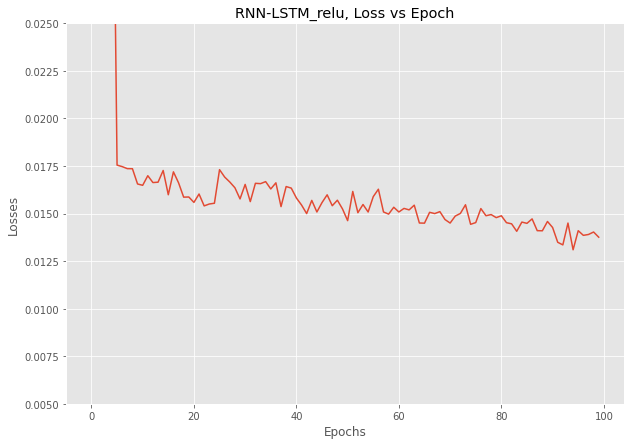

<Figure size 432x288 with 0 Axes>

In [51]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("RNN-LSTM_relu, Loss vs Epoch")
plt.ylim([0.005, 0.025]) # set y-axis limits
plt.show()
plt.savefig('RNN_LSTM_relu_loss_vs_epoch')

# RNN-LSTM tanh

In [57]:
# Create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dropout, Dense

# clear the previous session
clear_session()

n_features = X_train.shape[2]
n_input = X_train.shape[1]
n_output = y_train.shape[1]

model2 = Sequential()
model2.add(SimpleRNN(128, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model2.add(LSTM(64, activation='tanh', return_sequences=True))
model2.add(LSTM(32, activation='tanh'))
model2.add(Dropout(0.2))
model2.add(Dense(n_output))

from tensorflow.keras.optimizers import Adam

adam_optimizer = Adam(learning_rate=lr_rate)
model2.compile(optimizer = adam_optimizer, 
              loss = "mean_squared_error",
              metrics = ["mae"])

model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30, 128)           16640     
                                                                 
 lstm (LSTM)                 (None, 30, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 78,497
Trainable params: 78,497
Non-trainable params: 0
_________________________________________________________________


In [58]:
%%time

from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoint filepath
filepath = "rnn_lstm_tanh_power_checkpoint.h5"

# Define checkpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Fit model
epochs = 100
verbose = 1

history2 = model2.fit(X_train, y_train, epochs=epochs, verbose=verbose, batch_size=16,
                    validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/100
62/62 [==============================] - ETA: 0s - loss: 0.0345 - mae: 0.1472
Epoch 1: val_loss improved from inf to 0.01194, saving model to rnn_lstm_tanh_power_checkpoint.h5
62/62 [==============================] - 16s 109ms/step - loss: 0.0345 - mae: 0.1472 - val_loss: 0.0119 - val_mae: 0.0844
Epoch 2/100
61/62 [============================>.] - ETA: 0s - loss: 0.0172 - mae: 0.1014
Epoch 2: val_loss improved from 0.01194 to 0.00950, saving model to rnn_lstm_tanh_power_checkpoint.h5
62/62 [==============================] - 4s 63ms/step - loss: 0.0172 - mae: 0.1013 - val_loss: 0.0095 - val_mae: 0.0733
Epoch 3/100
62/62 [==============================] - ETA: 0s - loss: 0.0169 - mae: 0.0980
Epoch 3: val_loss improved from 0.00950 to 0.00934, saving model to rnn_lstm_tanh_power_checkpoint.h5
62/62 [==============================] - 6s 99ms/step - loss: 0.0169 - mae: 0.0980 - val_loss: 0.0093 - val_mae: 0.0725
Epoch 4/100
61/62 [============================>.] - ETA: 0s - los

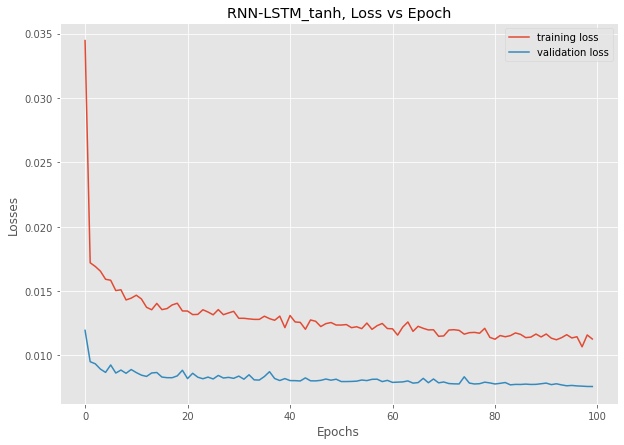

<Figure size 432x288 with 0 Axes>

In [62]:
plt.figure(figsize=(10, 7))
plt.plot(history2.history["loss"], label='training loss')
plt.plot(history2.history["val_loss"], label='validation loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("RNN-LSTM_tanh, Loss vs Epoch")
# plt.ylim([0.005, 0.025]) # set y-axis limits

plt.show()
plt.savefig('RNN_LSTM_tanh_loss_vs_epoch.png')

In [52]:
# Loss and mae value for the model in test mode
score = model.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss: {score[0]:.4f}') 
print(f'Test mae: {score[1]:.4f}')

Test loss: 0.0084
Test mae: 0.0676


In [53]:
# Loss and mae value for the model in test mode
score = model2.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss: {score[0]:.4f}') 
print(f'Test mae: {score[1]:.4f}')

Test loss: 0.0074
Test mae: 0.0642
